In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go

# Check if 'seaborn-darkgrid' is available, otherwise use 'ggplot'
import matplotlib
available_styles = plt.style.available
if 'seaborn-darkgrid' in available_styles:
    matplotlib.style.use('seaborn-darkgrid')
else:
    matplotlib.style.use('ggplot')

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#Importing complete wind and solar energy  data for 2015- 2021 Germany

In [2]:
df = pd.read_csv("/Users/arunkumaraluru/Desktop/project code/capstone project/SOLAR-AND-WIND-ENERGY-PREDICTION-main/time_series_60min_singleindex_filtered.csv", parse_dates=[0], index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    50401 non-null  object 
 1   DE_load_actual_entsoe_transparency    50400 non-null  float64
 2   DE_load_forecast_entsoe_transparency  50376 non-null  float64
 3   DE_solar_capacity                     43800 non-null  float64
 4   DE_solar_generation_actual            50297 non-null  float64
 5   DE_solar_profile                      43696 non-null  float64
 6   DE_wind_capacity                      43800 non-null  float64
 7   DE_wind_generation_actual             50326 non-null  float64
 8   DE_wind_profile                       43725 non-null  float64
 9   DE_wind_offshore_capacity             43800 non-null  float64
 10  DE_wind_offshore_generation_actual 

In [4]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2016-05-31 21:00:00+00:00  2016-05-31T23:00:00+0200   
2016-05-31 22:00:00+00:00  2016-06-01T00:00:00+0200   
2016-05-31 23:00:00+00:00  2016-06-01T01:00:00+0200   
2016-06-01 00:00:00+00:00  2016-06-01T02:00:00+0200   
...                                             ...   
2016-12-09 18:00:00+00:00  2016-12-09T19:00:00+0100   
2016-12-09 19:00:00+00:00  2016-12-09T20:00:00+0100   
2016-12-09 20:00:00+00:00  2016-12-09T21:00:00+0100   
2016-12-09 21:00:00+00:00  2016-12-09T22:00:00+0100   
2016-12-09 22:00:00+00:00  2016-12-09T23:00:00+0100   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2016-05-31 21:00:00+00:00                             49286.0   
2016-05-31 22:00:00+00:00                             45570.0   
2016-05-31 23:00:00+00:00                             43906.0   
2016-06-01 00:00:00+00:00                             43059.0   
...                                                       ...   
2016-12-09 18:00:00+00:00                             67805.0   
2016-12-09 19:00:00+00:00                             63626.0   
2016-12-09 20:00:00+00:00                             59988.0   
2016-12-09 21:00:00+00:00                             57554.0   
2016-12-09 22:00:00+00:00                             53978.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2016-05-31 21:00:00+00:00                               47884.0   
2016-05-31 22:00:00+00:00                               44767.0   
2016-05-31 23:00:00+00:00                               42865.0   
2016-06-01 00:00:00+00:00                               41763.0   
...                                                         ...   
2016-12-09 18:00:00+00:00                               68936.0   
2016-12-09 19:00:00+00:00                               65169.0   
2016-12-09 20:00:00+00:00                               61899.0   
2016-12-09 21:00:00+00:00                               59608.0   
2016-12-09 22:00:00+00:00                               55101.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2016-05-31 21:00:00+00:00            38989.0                         NaN   
2016-05-31 22:00:00+00:00            38991.0                         NaN   
2016-05-31 23:00:00+00:00            38991.0                         NaN   
2016-06-01 00:00:00+00:00            38991.0                         NaN   
...                                      ...                         ...   
2016-12-09 18:00:00+00:00            39699.0                         NaN   
2016-12-09 19:00:00+00:00            39699.0                         NaN   
2016-12-09 20:00:00+00:00            39699.0                         NaN   
2016-12-09 21:00:00+00:00            39699.0                         NaN   
2016-12-09 22:00:00+00:00            39699.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2016-05-31 21:00:00+00:00               NaN           34217.0   
2016-05-31 22:00:00+00:00               NaN           34238.0   
2016-05-31 23:00:00+00:00               NaN           34238.0   
2016-06-01 00:00:00+00:00               NaN           34238.0   
...                                     ...               ...   
2016-12-09 18:00:00+00:00               NaN           36538.0   
2016-12-09 19:00:00+00:00

In [5]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2015-01-01 00:00:00+00:00  2015-01-01T01:00:00+0100   
2015-01-01 01:00:00+00:00  2015-01-01T02:00:00+0100   
2015-01-01 02:00:00+00:00  2015-01-01T03:00:00+0100   
2015-01-01 03:00:00+00:00  2015-01-01T04:00:00+0100   
...                                             ...   
2016-12-09 18:00:00+00:00  2016-12-09T19:00:00+0100   
2016-12-09 19:00:00+00:00  2016-12-09T20:00:00+0100   
2016-12-09 20:00:00+00:00  2016-12-09T21:00:00+0100   
2016-12-09 21:00:00+00:00  2016-12-09T22:00:00+0100   
2016-12-09 22:00:00+00:00  2016-12-09T23:00:00+0100   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
...                                                       ...   
2016-12-09 18:00:00+00:00                             67805.0   
2016-12-09 19:00:00+00:00                             63626.0   
2016-12-09 20:00:00+00:00                             59988.0   
2016-12-09 21:00:00+00:00                             57554.0   
2016-12-09 22:00:00+00:00                             53978.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
...                                                         ...   
2016-12-09 18:00:00+00:00                               68936.0   
2016-12-09 19:00:00+00:00                               65169.0   
2016-12-09 20:00:00+00:00                               61899.0   
2016-12-09 21:00:00+00:00                               59608.0   
2016-12-09 22:00:00+00:00                               55101.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2015-01-01 00:00:00+00:00            37248.0                         NaN   
2015-01-01 01:00:00+00:00            37248.0                         NaN   
2015-01-01 02:00:00+00:00            37248.0                         NaN   
2015-01-01 03:00:00+00:00            37248.0                         NaN   
...                                      ...                         ...   
2016-12-09 18:00:00+00:00            39699.0                         NaN   
2016-12-09 19:00:00+00:00            39699.0                         NaN   
2016-12-09 20:00:00+00:00            39699.0                         NaN   
2016-12-09 21:00:00+00:00            39699.0                         NaN   
2016-12-09 22:00:00+00:00            39699.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
...                                     ...               ...   
2016-12-09 18:00:00+00:00               NaN           36538.0   
2016-12-09 19:00:00+00:00

In [6]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual 

cet_cest_timestamp                         0
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual               104
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                 75
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

####Filling null values from the values of the day before 

In [7]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

####Rechecking the null values (whatever left)

In [8]:
df[df['DE_solar_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   
2015-01-01 04:00:00+00:00               None   
2015-01-01 05:00:00+00:00               None   
2015-01-01 06:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
2015-01-01 04:00:00+00:00                             38941.0   
2015-01-01 05:00:00+00:00                             39045.0   
2015-01-01 06:00:00+00:00                             40206.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
2015-01-01 04:00:00+00:00                               38773.0   
2015-01-01 05:00:00+00:00                               37247.0   
2015-01-01 06:00:00+00:00                               40371.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2015-01-01 00:00:00+00:00            37248.0                         NaN   
2015-01-01 01:00:00+00:00            37248.0                         NaN   
2015-01-01 02:00:00+00:00            37248.0                         NaN   
2015-01-01 03:00:00+00:00            37248.0                         NaN   
2015-01-01 04:00:00+00:00            37248.0                         NaN   
2015-01-01 05:00:00+00:00            37248.0                         NaN   
2015-01-01 06:00:00+00:00            37248.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
2015-01-01 04:00:00+00:00               NaN           27913.0   
2015-01-01 05:00:00+00:00               NaN           27913.0   
2015-01-01 06:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                        NaN              NaN   
2015-01-01 00:00:00+00:00                     8852.0           0.3171   
2015-01-01 01:00:00+00:00                     9054.0           0.3244   
2015-01-01 02:00:00+00:00                     9070.0           0.3249   
2015-01-01 03:00:00+00:00                     9163.0           0.3283   
2015-01-01 04:00:00+00:00                     9231.0           0.3307   
2015-01-01 05:00:00+00:00                     9689.0           0.3471   
2015-01-01 06:00:00+00:00                    10331.0           0.3701   

                           DE_wind_offshore_capacity  \
utc_timestamp           

Observation --> The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before.

In [9]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True) 

####Repeating the same for wind energy

In [10]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]



####Replacing the null values (whatever left) by mean



In [11]:
df[df['DE_wind_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   
2015-01-01 04:00:00+00:00               None   
2015-01-01 05:00:00+00:00               None   
2015-01-01 06:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
2015-01-01 04:00:00+00:00                             38941.0   
2015-01-01 05:00:00+00:00                             39045.0   
2015-01-01 06:00:00+00:00                             40206.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
2015-01-01 04:00:00+00:00                               38773.0   
2015-01-01 05:00:00+00:00                               37247.0   
2015-01-01 06:00:00+00:00                               40371.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   
2015-01-01 04:00:00+00:00            37248.0                         0.0   
2015-01-01 05:00:00+00:00            37248.0                         0.0   
2015-01-01 06:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
2015-01-01 04:00:00+00:00               NaN           27913.0   
2015-01-01 05:00:00+00:00               NaN           27913.0   
2015-01-01 06:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                        NaN              NaN   
2015-01-01 00:00:00+00:00                        NaN           0.3171   
2015-01-01 01:00:00+00:00                        NaN           0.3244   
2015-01-01 02:00:00+00:00                        NaN           0.3249   
2015-01-01 03:00:00+00:00                        NaN           0.3283   
2015-01-01 04:00:00+00:00                        NaN           0.3307   
2015-01-01 05:00:00+00:00                        NaN           0.3471   
2015-01-01 06:00:00+00:00                        NaN           0.3701   

                           DE_wind_offshore_capacity  \
utc_timestamp           

In [12]:
df['DE_wind_generation_actual'].mean()

11556.499335225131

In [13]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)

In [14]:
df.isna().sum()

cet_cest_timestamp                         8
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual                 0
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                  0
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

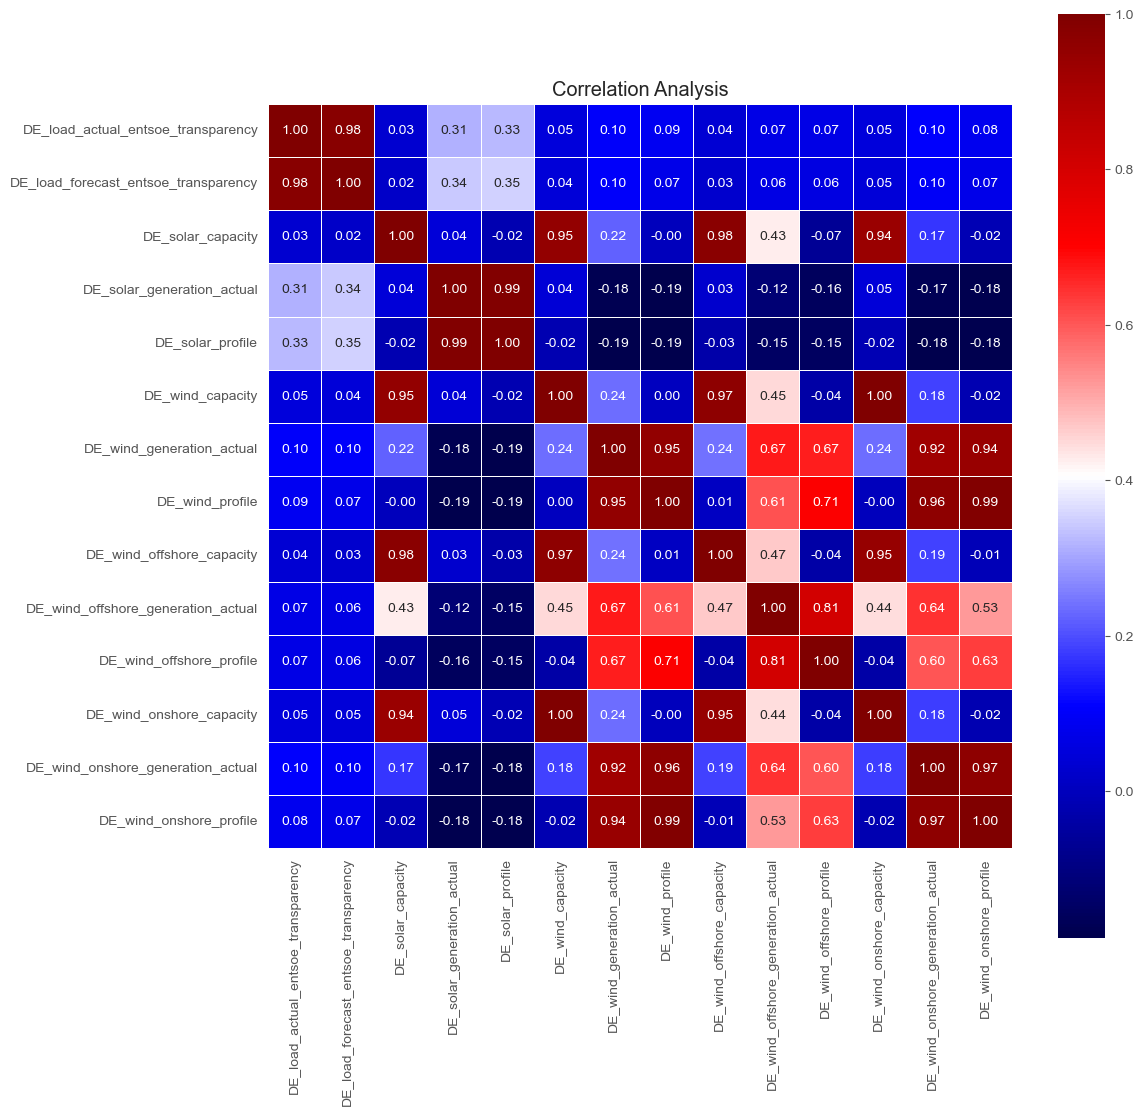

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=numeric_df.corr(),
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()


solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation 

#dataset with timestamps as features (used later for time series forecasting models)

In [16]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00                      None   
2015-01-01 00:00:00+00:00                      None   
2015-01-01 01:00:00+00:00                      None   
2015-01-01 02:00:00+00:00                      None   
2015-01-01 03:00:00+00:00                      None   
...                                             ...   
2020-09-30 19:00:00+00:00  2020-09-28T21:00:00+0200   
2020-09-30 20:00:00+00:00  2020-09-28T22:00:00+0200   
2020-09-30 21:00:00+00:00  2020-09-28T23:00:00+0200   
2020-09-30 22:00:00+00:00  2020-09-29T00:00:00+0200   
2020-09-30 23:00:00+00:00  2020-09-29T01:00:00+0200   

                           DE_solar_generation_actual  \
utc_timestamp                                           
2014-12-31 23:00:00+00:00                         0.0   
2015-01-01 00:00:00+00:00                         0.0   
2015-01-01 01:00:00+00:00                         0.0   
2015-01-01 02:00:00+00:00                         0.0   
2015-01-01 03:00:00+00:00                         0.0   
...                                               ...   
2020-09-30 19:00:00+00:00                         0.0   
2020-09-30 20:00:00+00:00                         0.0   
2020-09-30 21:00:00+00:00                         0.0   
2020-09-30 22:00:00+00:00                         0.0   
2020-09-30 23:00:00+00:00                         0.0   

                           DE_wind_generation_actual  
utc_timestamp                                         
2014-12-31 23:00:00+00:00                    11556.0  
2015-01-01 00:00:00+00:00                    11556.0  
2015-01-01 01:00:00+00:00                    11556.0  
2015-01-01 02:00:00+00:00                    11556.0  
2015-01-01 03:00:00+00:00                    11556.0  
...                                              ...  
2020-09-30 19:00:00+00:00                     2516.0  
2020-09-30 20:00:00+00:00                     2180.0  
2020-09-30 21:00:00+00:00                     1834.0  
2020-09-30 22:00:00+00:00                     1722.0  
2020-09-30 23:00:00+00:00                     1535.0  

[50401 rows x 3 columns]

In [17]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before. We see that it that it also turned the dummy column, cet_cest_timestamp, into nulls at the same location. This is why I used it as dummy column.

In [18]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

# EDA

##Histograms for solar_generation_actual and wind_generation_actual 

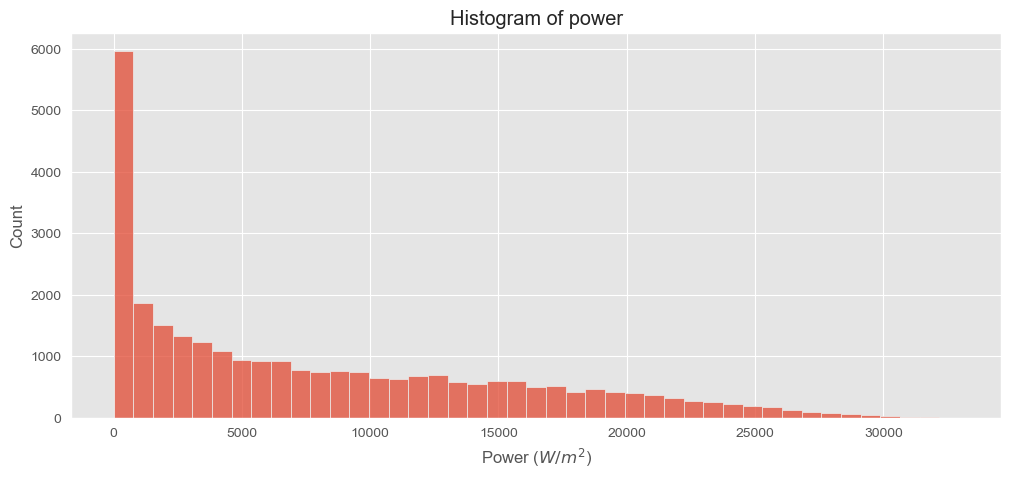

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

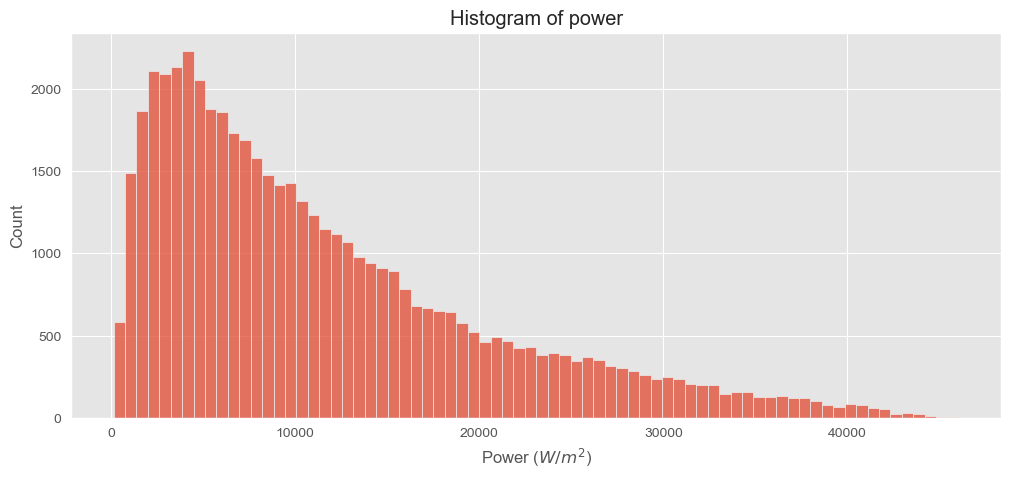

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

In [21]:
# We will create a new data frame so that we can make the appropriate boxplots. 
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               50401 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  50401 non-null  float64            
 2   DE_wind_generation_actual   50401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 1.2 MB


In [22]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

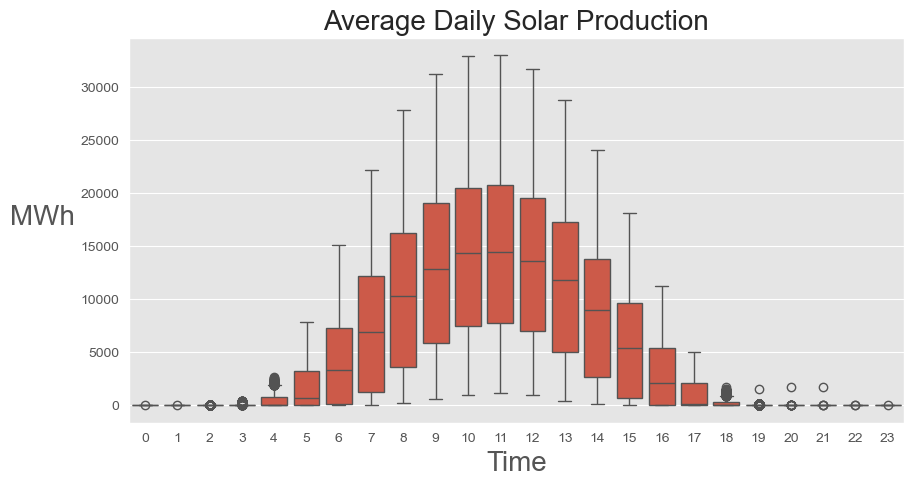

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average solar generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_solar_generation_actual', data=DE_energy)

plt.title('Average Daily Solar Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


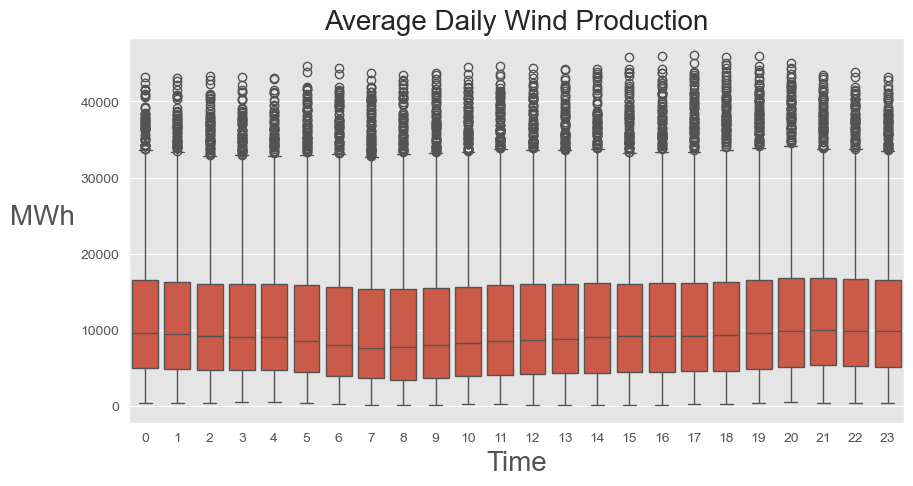

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average wind generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_wind_generation_actual', data=DE_energy)

plt.title('Average Daily Wind Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


Wind appears to not differ as much during the day as solar.The time of day does affect wind speed with surface temperatures increasing, however it is not shown in this plot.

We can use mean over all the days to get a better time series analysis with less noise.

In [25]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

DE_solar_generation_actual  \
utc_timestamp                                           
2014-12-31 00:00:00+00:00                    0.000000   
2015-01-01 00:00:00+00:00                  712.416667   
2015-01-02 00:00:00+00:00                  323.208333   
2015-01-03 00:00:00+00:00                  301.541667   
2015-01-04 00:00:00+00:00                  832.583333   
...                                               ...   
2020-09-26 00:00:00+00:00                 2713.125000   
2020-09-27 00:00:00+00:00                 1527.083333   
2020-09-28 00:00:00+00:00                 4035.666667   
2020-09-29 00:00:00+00:00                 4656.791667   
2020-09-30 00:00:00+00:00                 3706.958333   

                           DE_wind_generation_actual  
utc_timestamp                                         
2014-12-31 00:00:00+00:00               11556.000000  
2015-01-01 00:00:00+00:00               14194.458333  
2015-01-02 00:00:00+00:00               25148.083333  
2015-01-03 00:00:00+00:00               19289.791667  
2015-01-04 00:00:00+00:00               16042.625000  
...                                              ...  
2020-09-26 00:00:00+00:00               13015.041667  
2020-09-27 00:00:00+00:00               16333.916667  
2020-09-28 00:00:00+00:00                7771.750000  
2020-09-29 00:00:00+00:00                3083.833333  
2020-09-30 00:00:00+00:00                3050.583333  

[2101 rows x 2 columns]

In [26]:
modified.shape

(2101, 2)

#time series plot for energy averged over all days

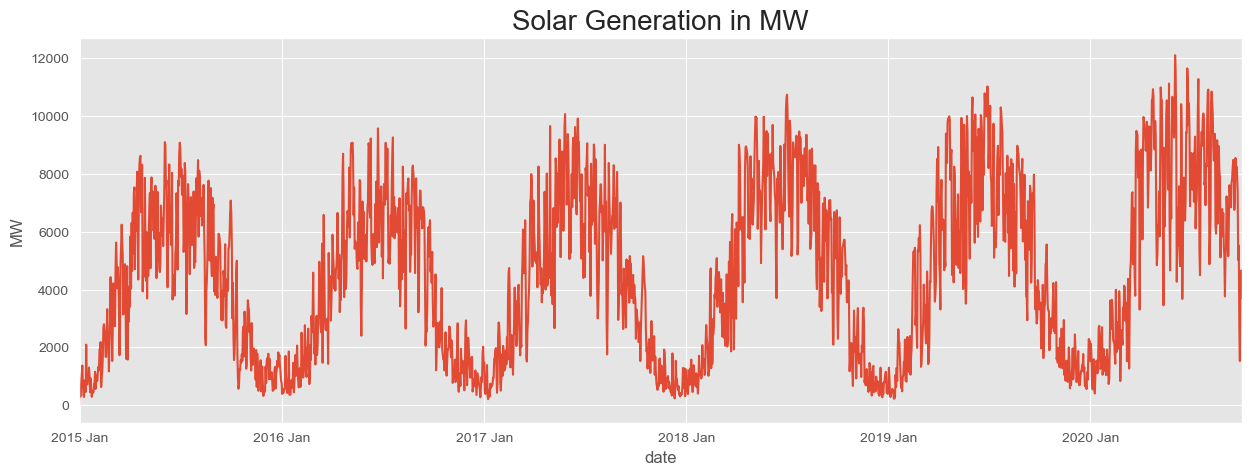

In [27]:
# visualize the time time series of solar 
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

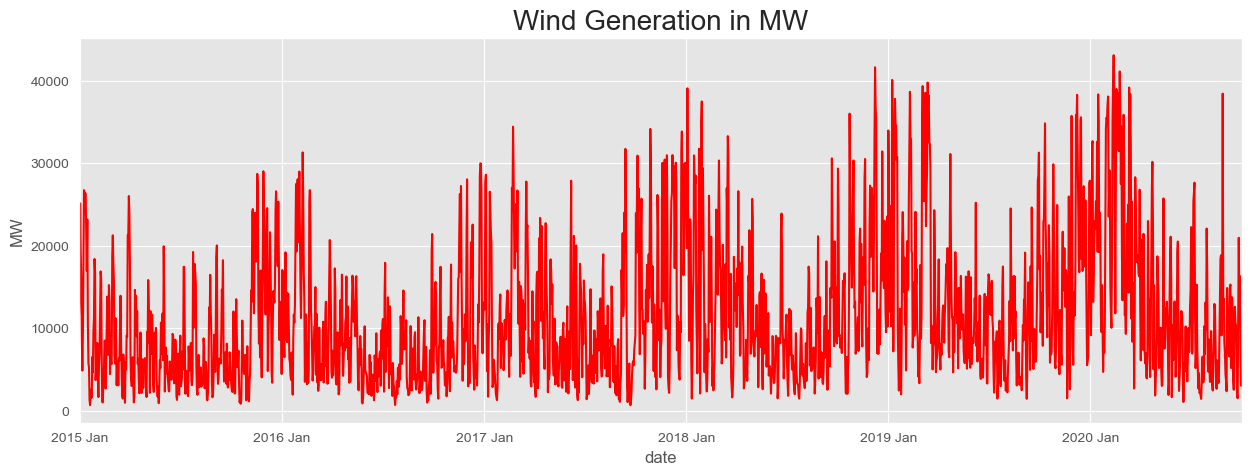

In [28]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [29]:
# Lets check out some basic statistics for the data
modified.describe()

DE_solar_generation_actual  DE_wind_generation_actual
count                 2101.000000                2101.000000
mean                  4557.518582               11556.499028
std                   2903.978814                8410.922186
min                      0.000000                 686.750000
25%                   1763.458333                5182.708333
50%                   4484.958333                9116.208333
75%                   6916.333333               15759.125000
max                  12101.208333               43086.875000

#MACHINE LEARNING ALOGORITHMS 

##Train-Test-Split

In [30]:
df.head()

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                    11556.0              NaN   
2015-01-01 00:00:00+00:00                    11556.0           0.3171   
2015-01-01 01:00:00+00:00                    11556.0           0.3244   
2015-01-01 02:00:00+00:00                    11556.0           0.3249   
2015-01-01 03:00:00+00:00                    11556.0           0.3283   

                           DE_wind_offshore_capacity  \
utc_timestamp                                          
2014-12-31 23:00:00+00:00                      667.0   
2015-01-01 00:00:00+00:00                      667.0   
2015-01-01 01:00:00+00:00                      667.0   
2015-01-01 02:00:00+00:00                      667.0   
2015-01-01 03:00:00+00:00                      667.0   

                           DE_wind_offshore_generation_actual  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                               517.0   
2015-01-01 01:00:00+00:00                               514.0   
2015-01-01 02:00:00+00:00                               518.0   
2015-01-01 03:00:00+00:00                               520.0   

                           DE_wind_offshore_profile  DE_wind_onshore_capacity  \
utc_timestamp                                                                   
2014-12-31 23:00:00+00:00                       NaN                   27246.0   
2015-01-01 00:00:00+00:00                    0.7744                   27246.0   
2015-01-01 01:00:00+00:00                    0.7710                   27246.0   
2015-01-

In [31]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [32]:
df.fillna(0, inplace=True)

In [33]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df['DE_solar_profile'], df['DE_solar_generation_actual'],test_size = 0.2, random_state = None)

In [34]:
X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)

In [35]:
X1_train

array([[0.306 ],
       [0.    ],
       [0.    ],
       ...,
       [0.    ],
       [0.4408],
       [0.2374]])

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['DE_wind_profile'], df['DE_wind_generation_actual'],test_size = 0.2, random_state = None)

In [37]:
# For Wind Energy
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [38]:
X2_train

array([[0.    ],
       [0.4594],
       [0.    ],
       ...,
       [0.    ],
       [0.5085],
       [0.3269]])

##Lasso Regression

In [39]:
df.head()

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00                  0   
2015-01-01 00:00:00+00:00                  0   
2015-01-01 01:00:00+00:00                  0   
2015-01-01 02:00:00+00:00                  0   
2015-01-01 03:00:00+00:00                  0   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 0.0   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   0.0   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               0.0           27913.0   
2015-01-01 00:00:00+00:00               0.0           27913.0   
2015-01-01 01:00:00+00:00               0.0           27913.0   
2015-01-01 02:00:00+00:00               0.0           27913.0   
2015-01-01 03:00:00+00:00               0.0           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                    11556.0           0.0000   
2015-01-01 00:00:00+00:00                    11556.0           0.3171   
2015-01-01 01:00:00+00:00                    11556.0           0.3244   
2015-01-01 02:00:00+00:00                    11556.0           0.3249   
2015-01-01 03:00:00+00:00                    11556.0           0.3283   

                           DE_wind_offshore_capacity  \
utc_timestamp                                          
2014-12-31 23:00:00+00:00                      667.0   
2015-01-01 00:00:00+00:00                      667.0   
2015-01-01 01:00:00+00:00                      667.0   
2015-01-01 02:00:00+00:00                      667.0   
2015-01-01 03:00:00+00:00                      667.0   

                           DE_wind_offshore_generation_actual  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 0.0   
2015-01-01 00:00:00+00:00                               517.0   
2015-01-01 01:00:00+00:00                               514.0   
2015-01-01 02:00:00+00:00                               518.0   
2015-01-01 03:00:00+00:00                               520.0   

                           DE_wind_offshore_profile  DE_wind_onshore_capacity  \
utc_timestamp                                                                   
2014-12-31 23:00:00+00:00                    0.0000                   27246.0   
2015-01-01 00:00:00+00:00                    0.7744                   27246.0   
2015-01-01 01:00:00+00:00                    0.7710                   27246.0   
2015-01-

In [40]:
from sklearn.linear_model import Lasso
 
# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)

In [41]:
from sklearn.linear_model import Lasso
import numpy as np

# Ensure X2_train and X2_test are in the correct shape
X2_train = X2_train.values.reshape(-1, 1) if X2_train.ndim == 1 else X2_train
X2_test = X2_test.values.reshape(-1, 1) if X2_test.ndim == 1 else X2_test

# Wind energy
lasso = Lasso(alpha=1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)


In [42]:
#Hyperparameter tuning - alpha = 2
lasso = Lasso(alpha = 2)
lasso.fit(X1_train, y1_train)
y1_pred2 = lasso.predict(X1_test)

In [43]:
lasso = Lasso(alpha = 2)
lasso.fit(X2_train, y2_train)
y2_pred2 = lasso.predict(X2_test)

###Evaluation Metrics

####Mean Squared Error

In [44]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  14594100.677186878


In [45]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  40761096.28143734


In [46]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  14594415.070750736


In [ ]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  40760730.87566064


####Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1796.4668768954182


In [49]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  4103.720189783268


In [50]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1798.0540889322974


In [51]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  4104.731158013578


####Root Mean Squared Error

In [52]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3820.222595240607


In [53]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6384.441736082908


In [54]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3820.2637436112623


In [55]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6384.441736082908


####R Squared

In [56]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7002538587018836


In [57]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5047306118225954


In [58]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7002474014175535


In [59]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5047350517006156


###Plot

In [60]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#RIDGE REGRESSION

In [61]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeSolar = Ridge(alpha = 1)
ridgeSolar.fit(X1_train, y1_train)
y1_pred = ridgeSolar.predict(X1_test)

In [62]:
ridgeWind = Ridge(alpha = 1)
ridgeWind.fit(X2_train, y2_train)
y2_pred = ridgeSolar.predict(X2_test)

In [63]:
#Hyperparameter tuning - alpha = 2
ridgeSolar = Ridge(alpha = 2)
ridgeSolar.fit(X1_train, y1_train)
y1_pred2 = ridgeSolar.predict(X1_test)

In [64]:
ridgeWind = Ridge(alpha = 2)
ridgeWind.fit(X2_train, y2_train)
y2_pred2 = ridgeSolar.predict(X2_test)

##Evaluation Metrics

###Mean Squared Error

In [65]:
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  14594090.378705822


In [66]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  45873374.07031168


In [67]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  14594386.74546198


In [68]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  45850097.939179115


###Mean Absolute Error

In [69]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1796.406260895006


In [70]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  3519.380851608905


In [71]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1797.9271626932618


In [72]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  3518.5643708155226


###Root Mean Squared Error

In [73]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3820.2212473501872


In [74]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6772.988562688681


In [75]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3820.2600363668935


In [76]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

Wind RMSE =  6771.270038861182


###R Squared

In [77]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7002540702209095


In [78]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.4426136688628991


In [79]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.700247983186598


In [80]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.4428964864580287


###Plot

In [81]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#DECISION TREE

In [82]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [83]:
y1_pred = regressor.predict(X1_test)
  
# print the predicted price
y1_test


utc_timestamp
2018-06-26 18:00:00+00:00     1304.0
2016-12-03 02:00:00+00:00        0.0
2020-06-13 16:00:00+00:00     9841.0
2017-02-13 00:00:00+00:00        0.0
2018-06-28 14:00:00+00:00    10669.0
                              ...   
2015-10-01 07:00:00+00:00    11775.0
2019-05-23 13:00:00+00:00    23545.0
2016-09-01 13:00:00+00:00    15251.0
2020-02-29 19:00:00+00:00        0.0
2015-03-25 05:00:00+00:00      496.0
Name: DE_solar_generation_actual, Length: 10081, dtype: float64

In [84]:
y1_pred

array([ 1290.16666667,  1587.17924348,  1587.17924348, ...,
       16386.5       ,  1587.17924348,   560.8       ])

In [85]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X1_train, y1_train, cv=50)

In [86]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [87]:
y2_pred = regressor.predict(X2_test)
  
# print the predicted price
y2_test

utc_timestamp
2017-01-26 03:00:00+00:00     7094.0
2019-03-20 10:00:00+00:00     9951.0
2016-07-28 19:00:00+00:00     2123.0
2020-06-09 16:00:00+00:00     3213.0
2016-11-26 13:00:00+00:00     5971.0
                              ...   
2017-09-21 06:00:00+00:00     2402.0
2020-06-02 04:00:00+00:00     9016.0
2017-10-11 01:00:00+00:00    19071.0
2016-04-09 19:00:00+00:00     7701.0
2019-02-07 10:00:00+00:00    26080.0
Name: DE_wind_generation_actual, Length: 10081, dtype: float64

In [ ]:
y2_pred

array([ 7886.        ,  7587.        ,  2382.26315789, ...,
       22625.        ,  7167.        , 22889.5       ])

In [89]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X2_train, y2_train, cv=50)

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y1_pred, y1_test)

0.5813319175275208

In [92]:
r2_score(y2_pred, y2_test)

0.6096171384411733

In [93]:
from sklearn.metrics import mean_absolute_error as mae

In [94]:
error = mae(y1_test, y1_pred)
print(error)

1820.6285517725667


In [95]:
error = mae(y2_test, y2_pred)
print(error)

2955.3060183877533


In [96]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y1_test, y1_pred)
print(MSE)

14522829.288405707


In [97]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y2_test, y2_pred)
print(MSE)

24970627.618069205


In [98]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE 3810.883006391787


In [99]:
#root mean squared error for wind
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))

RMSE 4997.061898562915


Hyperparameter tuning with random state=1

In [100]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=1)

In [101]:
y1_pred2 = regressor.predict(X1_test)

In [102]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=1)

In [103]:
y2_pred2 = regressor.predict(X2_test)

In [104]:
r2_score(y1_pred2, y1_test)

0.5813319175275208

In [105]:
r2_score(y2_pred2, y2_test)

0.6096171384411733

In [106]:
MSE = mean_squared_error(y1_test, y1_pred2)
print(MSE)

14522829.288405707


In [107]:
MSE = mean_squared_error(y2_test, y2_pred2)
print(MSE)

24970627.618069205


In [108]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

RMSE 3810.883006391787


In [109]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

RMSE 4997.061898562915


In [110]:
error = mae(y1_test, y1_pred2)
print(error)

1820.6285517725667


In [111]:
error = mae(y2_test, y2_pred2)
print(error)

2955.3060183877533


In [112]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#RANDOM FOREST

parameters in Random forest- n_estimators and random state

##solar energy

In [113]:
df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
df_solar_x.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DE_load_actual_entsoe_transparency    50401 non-null  float64
 1   DE_load_forecast_entsoe_transparency  50401 non-null  float64
 2   DE_solar_profile                      50401 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [114]:
df_solar_x.isna().sum()

DE_load_actual_entsoe_transparency      0
DE_load_forecast_entsoe_transparency    0
DE_solar_profile                        0
dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)



In [116]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = solar_x_train

target = solar_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(solar_x_train,solar_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.13694
Feature: 1, Score: 0.14470
Feature: 2, Score: 0.71835


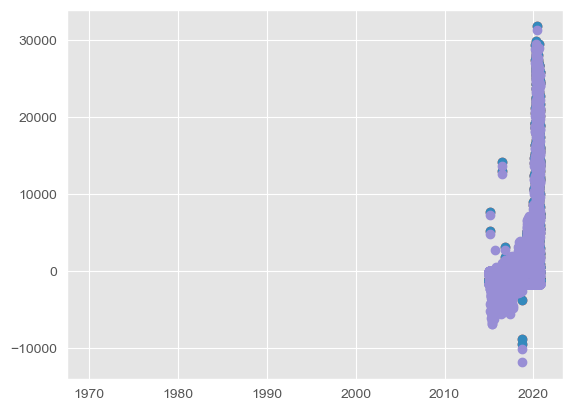

In [117]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

most important feature for random forest is solar_profile

In [118]:
y_pred = rfr.predict(solar_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 1550.9148505203093
Mean Squared Error: 13819164.673338527
Root Mean Squared Error: 3717.4137075846866
R square score: 0.715503654852162


##wind energy

In [119]:

df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [120]:
#df_wind_x.info()   #no null values
#df_wind_y.isna()

In [121]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [122]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

feature importance

Feature: 0, Score: 0.01037
Feature: 1, Score: 0.01085
Feature: 2, Score: 0.06825
Feature: 3, Score: 0.00270
Feature: 4, Score: 0.90513
Feature: 5, Score: 0.00270


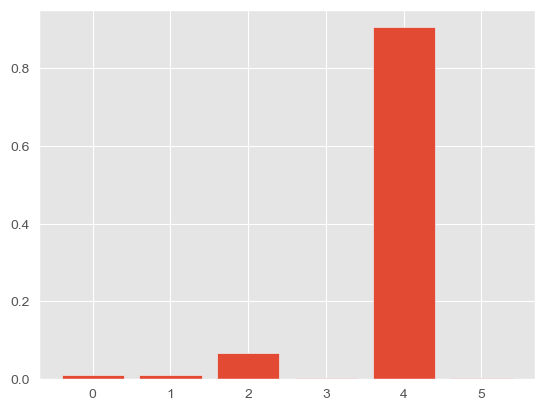

In [123]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

wind onshore generation actual and wind_profile are the most important features

In [124]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 10336.46434994838
Mean Squared Error: 174289738.62885654
Root Mean Squared Error: 13201.883904536373
R square score: -2.5881180092126796


poor r sqaure score--> making use of feature importance to remove unimportant features

In [125]:
df_wind_x2=df[['DE_wind_profile']]
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x2,df_wind_y,test_size = 0.2, random_state = None)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

RandomForestRegressor()

In [127]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

Mean Absolute Error: 10073.601979927842
Mean Squared Error: 157468178.026349
Root Mean Squared Error: 12548.632516188727
R square score: -2.2418110779168026


to improve score--> Hyper parameter tuning 

In [128]:
#wind energy
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)  

r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)


print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))

Wind R2 =  0.7127031811060343
Mean Absolute Error: 10073.601979927842
Mean Squared Error: 157468178.026349
Root Mean Squared Error: 12548.632516188727


#ARIMA MODEL

##For solar energy

In [ ]:
# Create a series for the solar generation
solar_power = modified['DE_solar_generation_actual']

In [ ]:
solar_power

utc_timestamp
2014-12-31 00:00:00+00:00       0.000000
2015-01-01 00:00:00+00:00     712.416667
2015-01-02 00:00:00+00:00     323.208333
2015-01-03 00:00:00+00:00     301.541667
2015-01-04 00:00:00+00:00     832.583333
                                ...     
2020-09-26 00:00:00+00:00    2713.125000
2020-09-27 00:00:00+00:00    1527.083333
2020-09-28 00:00:00+00:00    4035.666667
2020-09-29 00:00:00+00:00    4656.791667
2020-09-30 00:00:00+00:00    3706.958333
Freq: D, Name: DE_solar_generation_actual, Length: 2101, dtype: float64

In [131]:
solar_power.describe()

count     2101.000000
mean      4557.518582
std       2903.978814
min          0.000000
25%       1763.458333
50%       4484.958333
75%       6916.333333
max      12101.208333
Name: DE_solar_generation_actual, dtype: float64

In [132]:
# Check the decomposition of the solar power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(solar_power, period=365, model='additive')

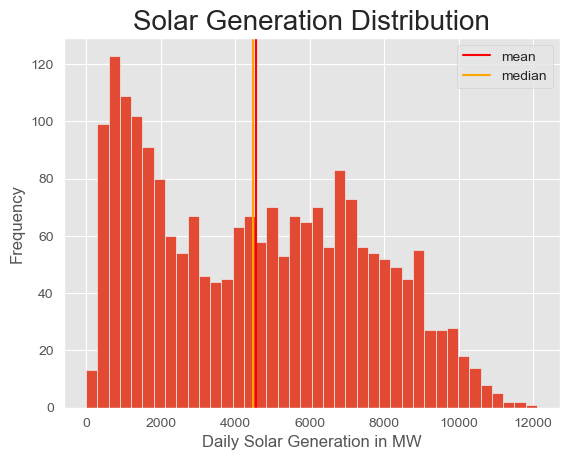

In [133]:
# Plot distribution
plt.figure()
plt.hist(solar_power, bins=40)
plt.title('Solar Generation Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Daily Solar Generation in MW')
plt.axvline(solar_power.mean(), c='red', label ='mean')
plt.axvline(solar_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

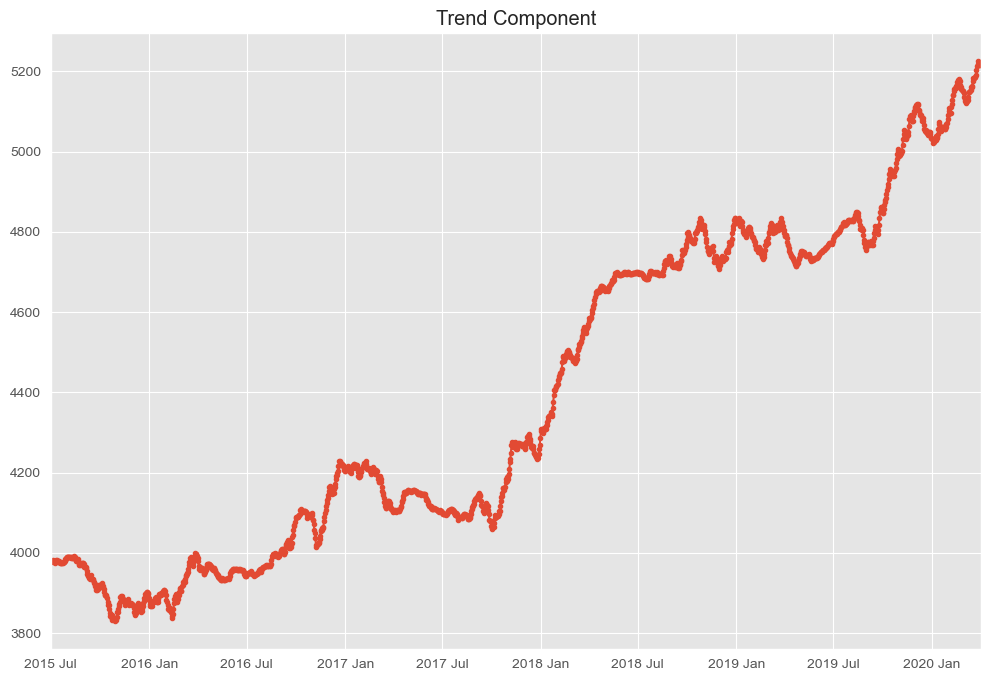

In [134]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#stationery check

In [135]:
s = adfuller(solar_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:0.13334411232749516


In [136]:
# Lets check the differencce 
s = adfuller(solar_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:1.492282647928768e-27


Series with difference is stationary because fo the p-value less than 0.05

#Finding the order of differencing for the ARIMA model

In [137]:
# check the time series
solar_power

utc_timestamp
2014-12-31 00:00:00+00:00       0.000000
2015-01-01 00:00:00+00:00     712.416667
2015-01-02 00:00:00+00:00     323.208333
2015-01-03 00:00:00+00:00     301.541667
2015-01-04 00:00:00+00:00     832.583333
                                ...     
2020-09-26 00:00:00+00:00    2713.125000
2020-09-27 00:00:00+00:00    1527.083333
2020-09-28 00:00:00+00:00    4035.666667
2020-09-29 00:00:00+00:00    4656.791667
2020-09-30 00:00:00+00:00    3706.958333
Freq: D, Name: DE_solar_generation_actual, Length: 2101, dtype: float64

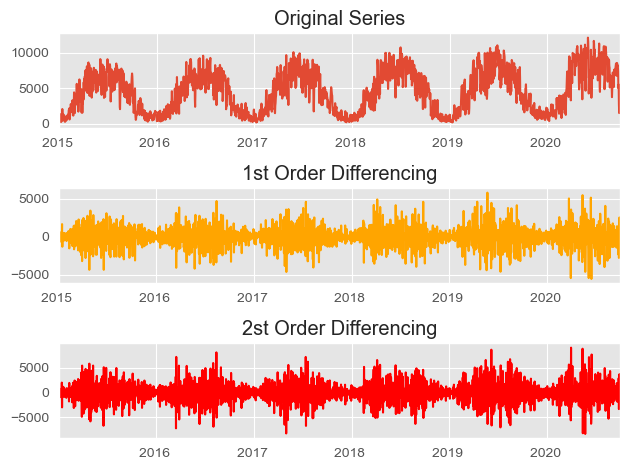

In [138]:
# Lets take a look at the timeseries compared to when we take the 1st and 2nd difference 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(solar_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(solar_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(solar_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()

In [139]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(solar_power, ax=ax[0])
fig = plot_acf(solar_power.diff().dropna(), ax=ax[1])
fig = plot_acf(solar_power.diff().diff().dropna(), ax=ax[2])

From the above series it is clear that the time series reaches stationary after one differencing. The second differencing goes far negative a little too quick which suggests some over differencing. I am going to use d=1 in my ARIMA model. We can see that the series is much more stationary in the first difference graph as well.

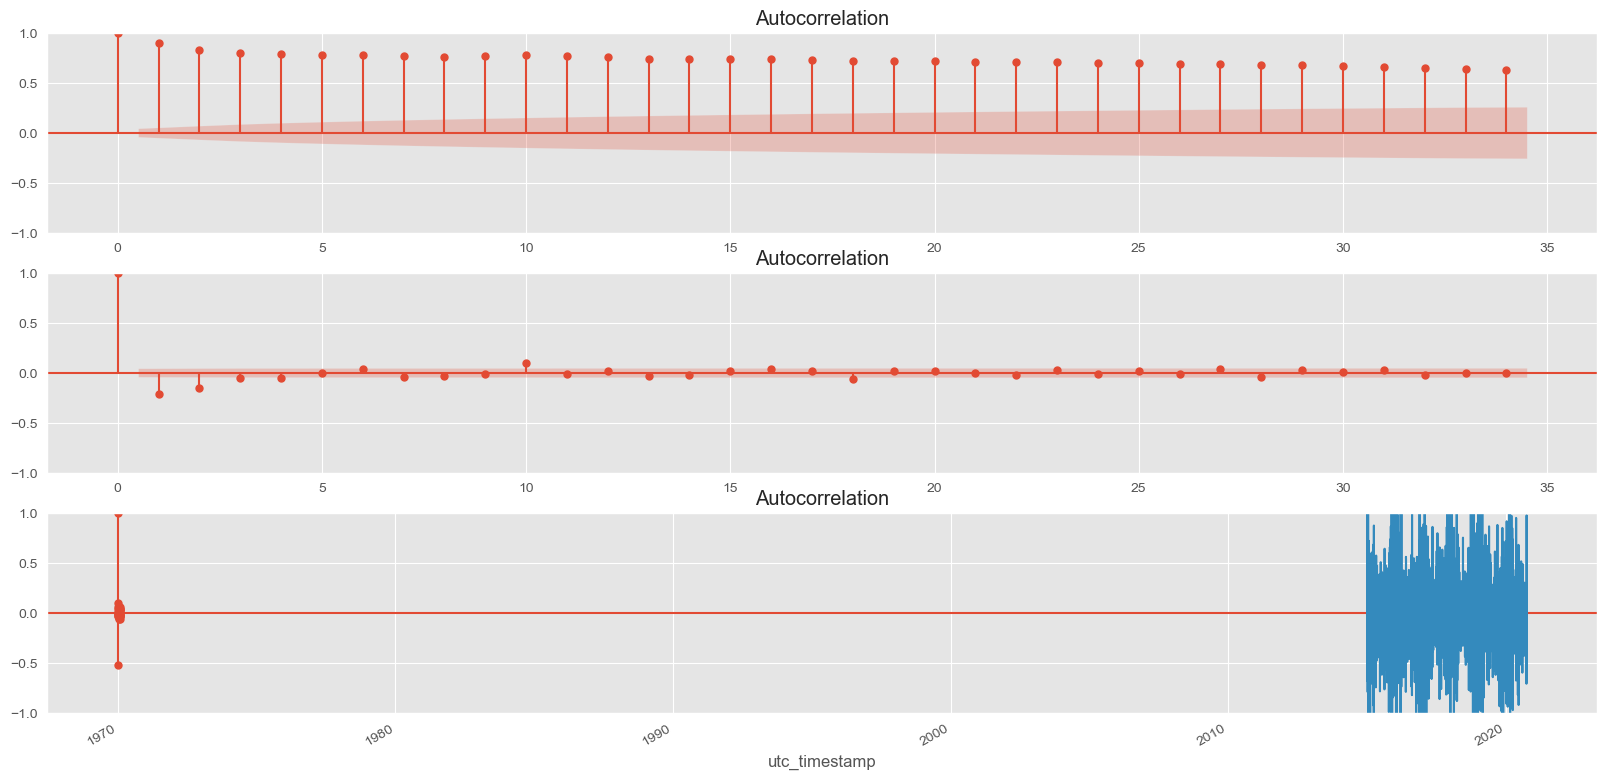

In [140]:
# ANother option would be to do a log transformation to deal with trend being statoinary but not strict stationary.
np.log(solar_power).diff().dropna().plot()
plt.show()

In [141]:
solar_log= np.log(solar_power).diff().dropna()

#Finding order of the ar term

For the ARIMA model we need to first find the the order (p,d,q). To find the first p order, it is good to look at the Partial auto correlation plot

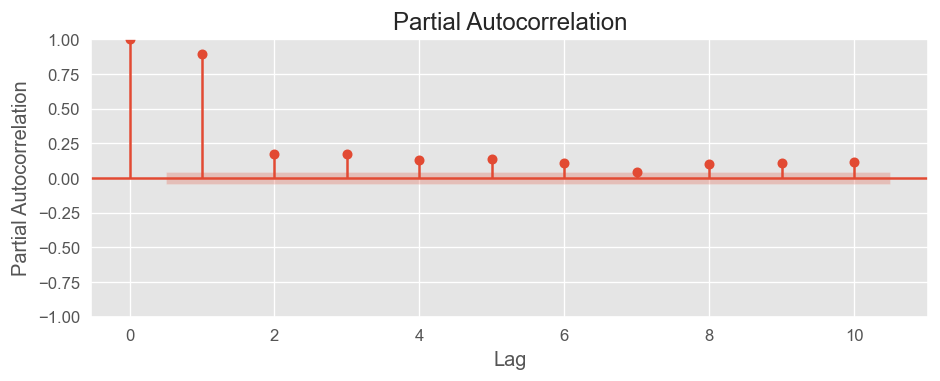

In [142]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

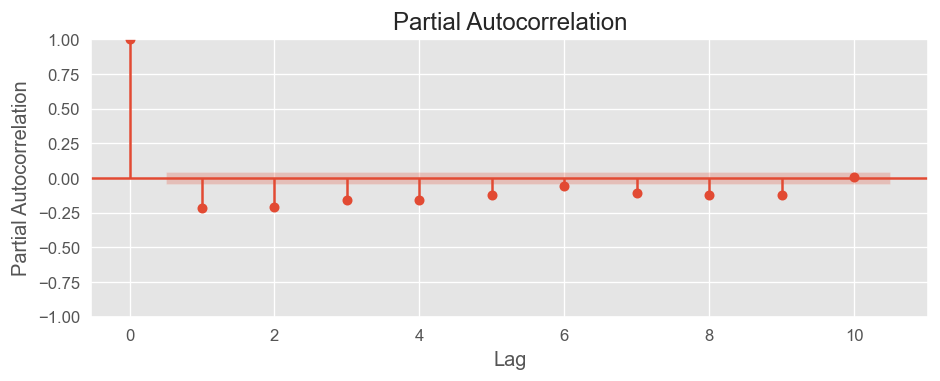

In [143]:
# lets check the differened one as well
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

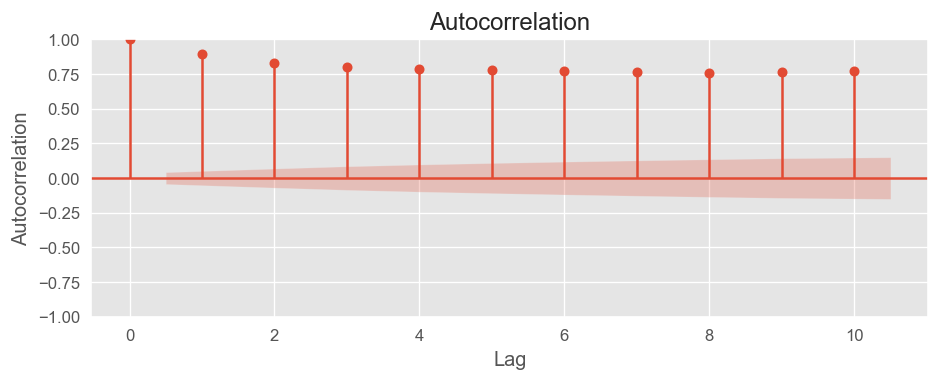

In [144]:
# to find the q value, it is helpful to look at the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

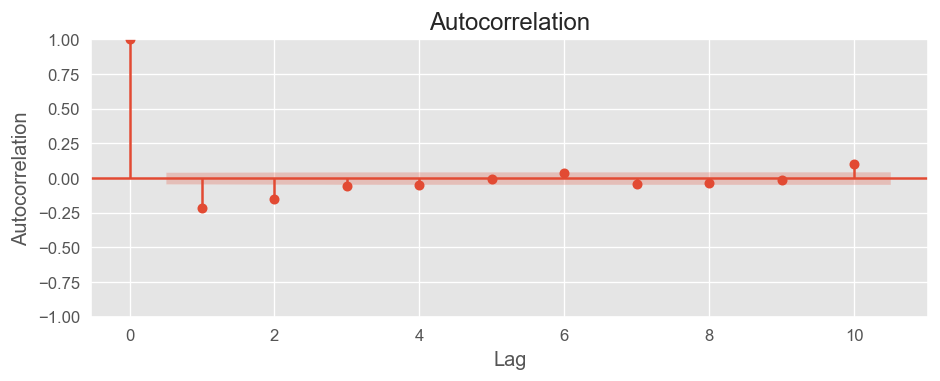

In [145]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

It looks likes 3 is the best answer for q=3.

#Train and test split

In [146]:
test_percent = .15
test_number = int(solar_power.shape[0]*test_percent)
train_s = solar_power[:-test_number]
test_s = solar_power[-test_number:]

In [147]:
train_s.shape

(1786,)

In [148]:
test_s.shape

(315,)

In [149]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_s, order=(6,1,6), 
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46583D+00    |proj g|=  5.64844D-02

At iterate    5    f=  8.46403D+00    |proj g|=  1.64820D-02

At iterate   10    f=  8.46349D+00    |proj g|=  9.83961D-03

At iterate   15    f=  8.46229D+00    |proj g|=  1.32818D-02

At iterate   20    f=  8.46170D+00    |proj g|=  4.75694D-03

At iterate   25    f=  8.46077D+00    |proj g|=  1.08778D-02

At iterate   30    f=  8.46043D+00    |proj g|=  3.13292D-03

At iterate   35    f=  8.46041D+00    |proj g|=  1.63797D-03

At iterate   40    f=  8.46036D+00    |proj g|=  4.05685D-03

At iterate   45    f=  8.46035D+00    |proj g|=  4.72482D-04

At iterate   50    f=  8.46035D+00    |proj g|=  1.23111D-04

At iterate   55    f=  8.46035D+00    |proj g|=  6.44839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

RMSE:  519.1210440265896


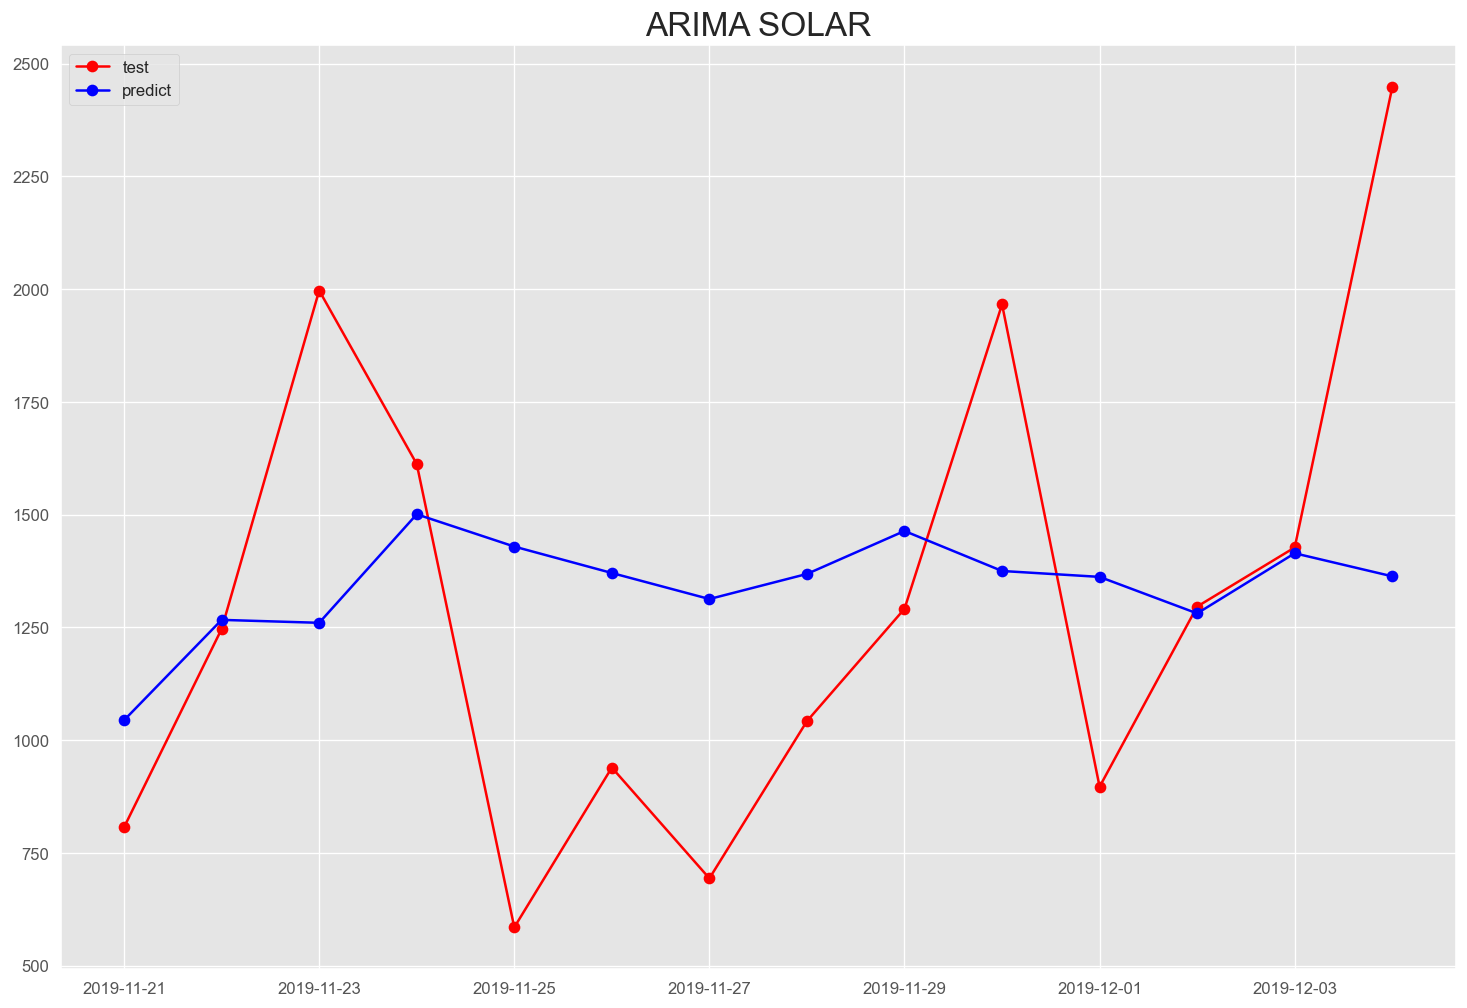

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index= test_s.index)

print("RMSE: ", sqrt(mean_squared_error(test_s[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test_s[:14], c="red", label="test", marker='o')
plt.plot(predictions[:14], c="blue", label="predict", marker='o')
plt.legend()
plt.title('ARIMA SOLAR', fontsize=(20))
plt.show();

In [151]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test_s[:14], predictions[:14]))

MAE:  404.888703930008


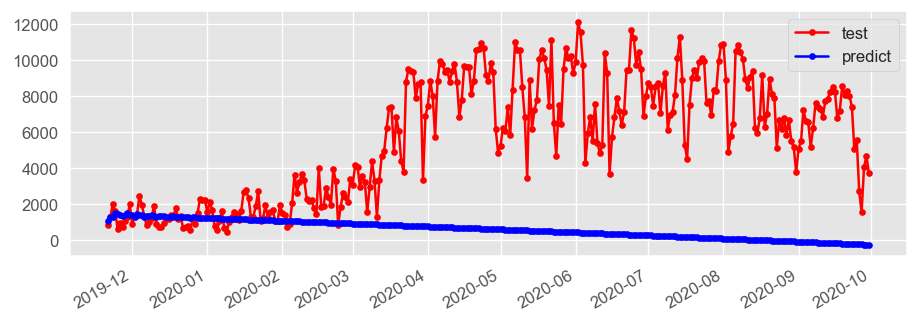

In [152]:
# make prediction
predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index=test_s.index)

fig = plt.figure()
plt.plot(test_s, c="red", label="test", marker='.')
plt.plot(predictions, c="blue", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()
plt.show();

In [153]:
# Run a loop throgh the model to find the best parameters 
best_MAE = float('inf')

for p in range(1,4):
    for d in range(0,2):
        for q in range(1,4):
            
            print(f"Trying values of {(p,d,q)}",end = "\r")
            
            model = SARIMAX(train_s,order = (p,d,q),
                           enforce_stationary = False,
                           enforce_invertibility = False,
                           trend = "t")
            
            model_fit = model.fit(maxiter = 2000)
            
            predictions = model_fit.predict(start=len(train_s),end = len(train_s) + len(test_s) - 1,typ="levels", index=test_s.index)
            
            current_MAE = mean_absolute_error(test_s[:10],predictions[:10])
            
            if (best_MAE > current_MAE):
                best_MAE = current_MAE
                print(f"Found new best MAE of {best_MAE} with values {(p,d,q)}")

RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55468D+00    |proj g|=  5.45234D-02

At iterate    5    f=  8.55128D+00    |proj g|=  2.38306D-02

At iterate   10    f=  8.54854D+00    |proj g|=  3.13916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   1.439D-05   8.549D+00
  F =   8.5485207183647312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 790.6111704058992 with values (1, 0, 1)
RUNNING

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.52303D+00    |proj g|=  7.60874D-03

At iterate   10    f=  8.51521D+00    |proj g|=  6.38611D-02

At iterate   15    f=  8.51345D+00    |proj g|=  1.80880D-02

At iterate   20    f=  8.51336D+00    |proj g|=  2.82116D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   2.821D-05   8.513D+00
  F =   8.5133607234812239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 489.362337670059 with values (1, 0, 2)
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  8.51345D+00    |proj g|=  5.13514D-03

At iterate   10    f=  8.50960D+00    |proj g|=  2.96733D-02

At iterate   15    f=  8.50640D+00    |proj g|=  3.39602D-02

At iterate   20    f=  8.50628D+00    |proj g|=  1.83291D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   2.399D-05   8.506D+00
  F =   8.5062822984059920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At ite

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.50214D+00    |proj g|=  2.00651D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   6.353D-05   8.502D+00
  F =   8.5019404048232872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 446.97646327432733 with values (1, 1, 1)
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50305D+00    |proj g|=  1.35679D-01

At iterate    5    f=  8.50027D+00    |proj g|=  1.27571D-02

     

 This problem is unconstrained.



At iterate    5    f=  8.50259D+00    |proj g|=  5.11154D-03

At iterate   10    f=  8.50032D+00    |proj g|=  1.69728D-02

At iterate   15    f=  8.49997D+00    |proj g|=  4.71877D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     25      1     0     0   2.527D-05   8.500D+00
  F =   8.4999649672668607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 437.3157828327735 with values (1, 1, 3)
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At ite

 This problem is unconstrained.



At iterate   25    f=  8.50707D+00    |proj g|=  2.52251D-02

At iterate   30    f=  8.50689D+00    |proj g|=  2.07301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   7.128D-05   8.507D+00
  F =   8.5068918429886295     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.53656D+00    |proj g|=  4.66472D-01

At iterate    5    f=  8.52043D+00    |proj g|=  4.44863D-02


 This problem is unconstrained.



At iterate   10    f=  8.51638D+00    |proj g|=  4.61237D-03

At iterate   15    f=  8.51271D+00    |proj g|=  5.42740D-02

At iterate   20    f=  8.50550D+00    |proj g|=  2.27056D-02

At iterate   25    f=  8.50508D+00    |proj g|=  1.10061D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   7.095D-05   8.505D+00
  F =   8.5050645773449922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At ite

 This problem is unconstrained.



At iterate    5    f=  8.51259D+00    |proj g|=  1.23817D-02

At iterate   10    f=  8.51037D+00    |proj g|=  4.39305D-03

At iterate   15    f=  8.51028D+00    |proj g|=  5.25211D-04

At iterate   20    f=  8.51027D+00    |proj g|=  2.35796D-03

At iterate   25    f=  8.50887D+00    |proj g|=  3.86381D-02

At iterate   30    f=  8.50541D+00    |proj g|=  8.69151D-02

At iterate   35    f=  8.50467D+00    |proj g|=  8.87557D-04

At iterate   40    f=  8.50466D+00    |proj g|=  2.44192D-03

At iterate   45    f=  8.50465D+00    |proj g|=  6.10994D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     54   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     17      1     0     0   6.392D-05   8.501D+00
  F =   8.5014264482249242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50250D+00    |proj g|=  1.87298D-01

At iterate    5    f=  8.50064D+00    |proj g|=  9.17296D-02

At iterate   10    f=  8.50021D+00    |proj g|=  1.75157D-04

           * * *

Tit   = total number of iterations
Tnf   = total n

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.26068D+00    |proj g|=  5.31687D+00

At iterate    5    f=  8.54886D+00    |proj g|=  1.06187D-01

At iterate   10    f=  8.51848D+00    |proj g|=  8.02769D-02

At iterate   15    f=  8.51611D+00    |proj g|=  4.98871D-02

At iterate   20    f=  8.51177D+00    |proj g|=  8.01518D-02

At iterate   25    f=  8.50424D+00    |proj g|=  4.76403D-02

At iterate   30    f=  8.50036D+00    |proj g|=  5.22062D-02

At iterate   35    f=  8.49988D+00    |proj g|=  9.01936D-03

At iterate   40    f=  8.49984D+00    |proj g|=  1.34464D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   45    f=  8.49984D+00    |proj g|=  1.21088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     75      1     0     0   1.211D-04   8.500D+00
  F =   8.4998354677649637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 435.97306764376356 with values (2, 1, 3)
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55390D+00    |proj g|=  3.30559D-02

At iterate    5    f=  8.55029D+00    |proj g|=  1.79360D-02

At it

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20378D+02    |proj g|=  8.45353D+02

At iterate    5    f=  9.10871D+00    |proj g|=  1.59773D+00

At iterate   10    f=  8.60023D+00    |proj g|=  2.06399D-01

At iterate   15    f=  8.54427D+00    |proj g|=  1.28113D-01

At iterate   20    f=  8.52433D+00    |proj g|=  1.21554D-01

At iterate   25    f=  8.50904D+00    |proj g|=  8.93900D-02

At iterate   30    f=  8.50535D+00    |proj g|=  6.36327D-03

At iterate   35    f=  8.50512D+00    |proj g|=  2.99896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  8.50764D+00    |proj g|=  2.48685D-02

At iterate   10    f=  8.50641D+00    |proj g|=  6.72388D-03

At iterate   15    f=  8.50490D+00    |proj g|=  6.19134D-03

At iterate   20    f=  8.50469D+00    |proj g|=  5.66212D-03

At iterate   25    f=  8.50464D+00    |proj g|=  7.18433D-03

At iterate   30    f=  8.50462D+00    |proj g|=  1.19431D-03

At iterate   35    f=  8.50461D+00    |proj g|=  1.91565D-04

At iterate   40    f=  8.50460D+00    |proj g|=  3.24692D-03

At iterate   45    f=  8.50442D+00    |proj g|=  1.86813D-02

At iterate   50    f=  8.50434D+00    |proj g|=  9.72435D-03

At iterate   55    f=  8.50432D+00    |proj g|=  1.37972D-03

At iterate   60    f=  8.50431D+00    |proj g|=  4.75239D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  8.51646D+00    |proj g|=  1.15342D-01

At iterate   10    f=  8.50134D+00    |proj g|=  1.65883D-02

At iterate   15    f=  8.50129D+00    |proj g|=  1.29211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     25      1     0     0   6.414D-05   8.501D+00
  F =   8.5012936985979177     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found new best MAE of 434.06351013428383 with values (3, 1, 1)
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At it

 This problem is unconstrained.



At iterate   10    f=  8.50026D+00    |proj g|=  2.64183D-02

At iterate   15    f=  8.50009D+00    |proj g|=  1.62700D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     22      1     0     0   5.726D-05   8.500D+00
  F =   8.5000911932662291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE)

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73631D+00    |proj g|=  3.11844D-01


 This problem is unconstrained.



At iterate    5    f=  8.55837D+00    |proj g|=  3.13525D-01

At iterate   10    f=  8.51395D+00    |proj g|=  1.31243D-01

At iterate   15    f=  8.50758D+00    |proj g|=  4.45363D-02

At iterate   20    f=  8.49975D+00    |proj g|=  5.07005D-02

At iterate   25    f=  8.49935D+00    |proj g|=  1.65905D-02

At iterate   30    f=  8.49806D+00    |proj g|=  1.68558D-01

At iterate   35    f=  8.49773D+00    |proj g|=  3.38213D-02

At iterate   40    f=  8.49764D+00    |proj g|=  6.96440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   3.778D-04   8.498D+00
  F =   8.49763874159

#For wind energy

In [154]:
# create a wind_power series
wind_power = modified['DE_wind_generation_actual']

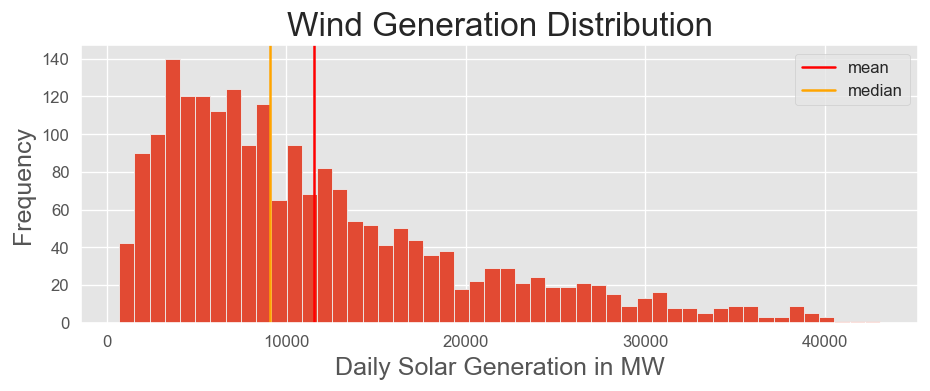

In [155]:
plt.figure()
plt.hist(wind_power, bins=50)
plt.title('Wind Generation Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Daily Solar Generation in MW',fontsize=15)
plt.axvline(wind_power.mean(), c='red', label ='mean')
plt.axvline(wind_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

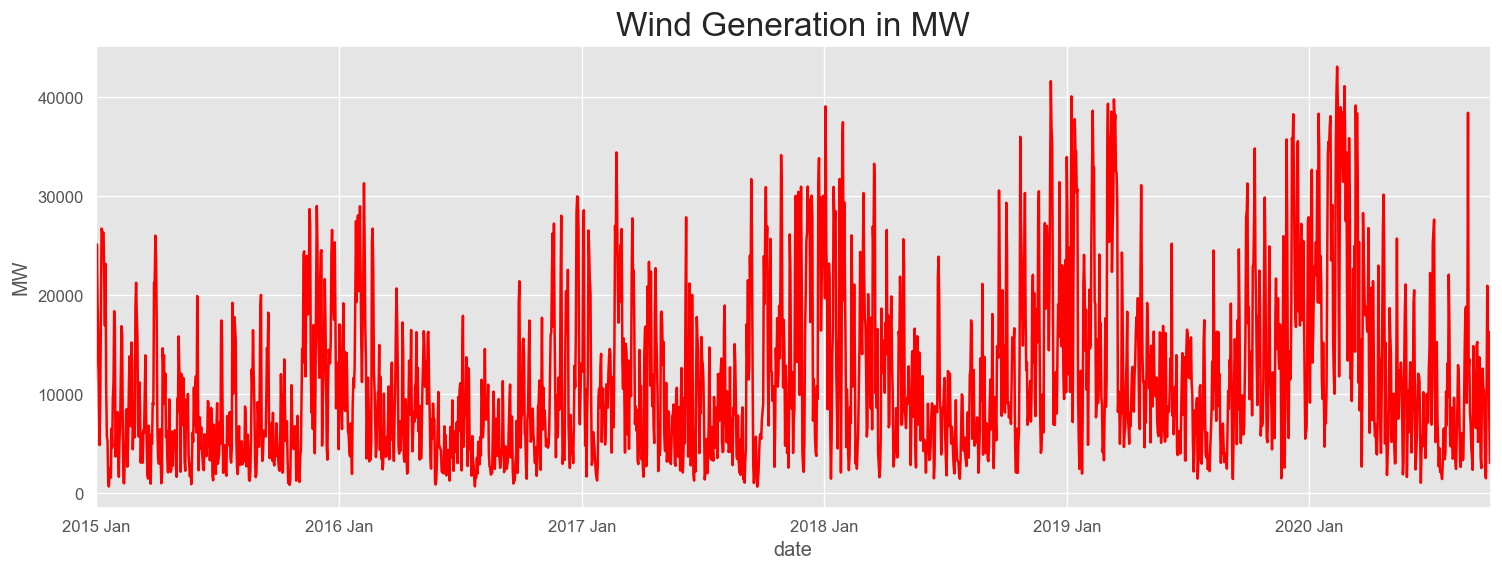

In [156]:
plt.figure(figsize=(15,5))
plt.plot(wind_power, c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [157]:
# Check the decomposition of the wind power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(wind_power, period=365, model='additive')

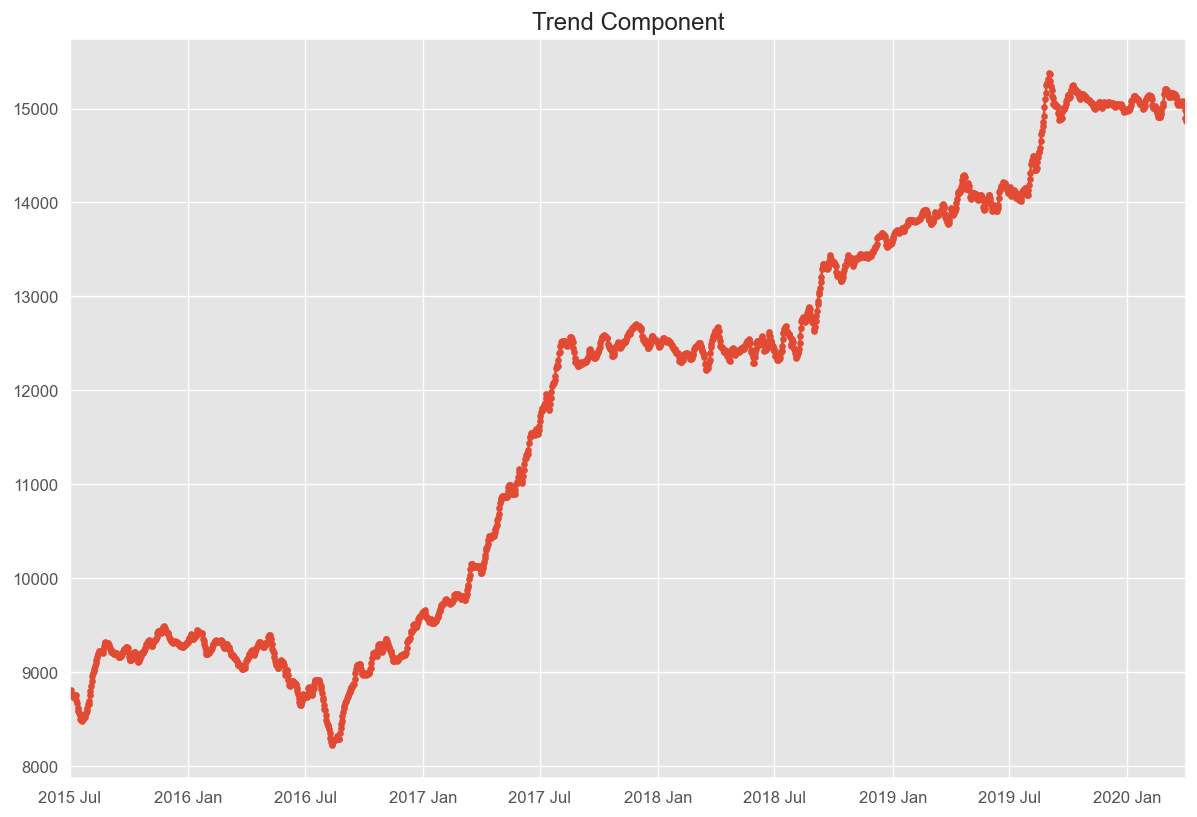

In [158]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#Stationery Check

In [159]:
s = adfuller(wind_power, regression='ct')
print('p-value:{}'.format(s[1]))

p-value:0.0008646251107839746


In [160]:
# Lets check the differencce 
s = adfuller(wind_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

p-value:3.92272568608886e-29


The series is stationery

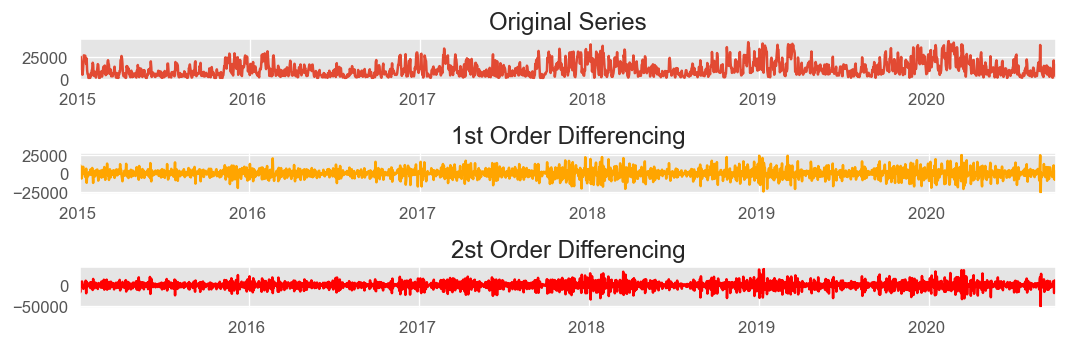

In [161]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(wind_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(wind_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(wind_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()


In [162]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(wind_power, ax=ax[0])
fig = plot_acf(wind_power.diff().dropna(), ax=ax[1])
fig = plot_acf(wind_power.diff().diff().dropna(), ax=ax[2])

#Finding order of the AR term

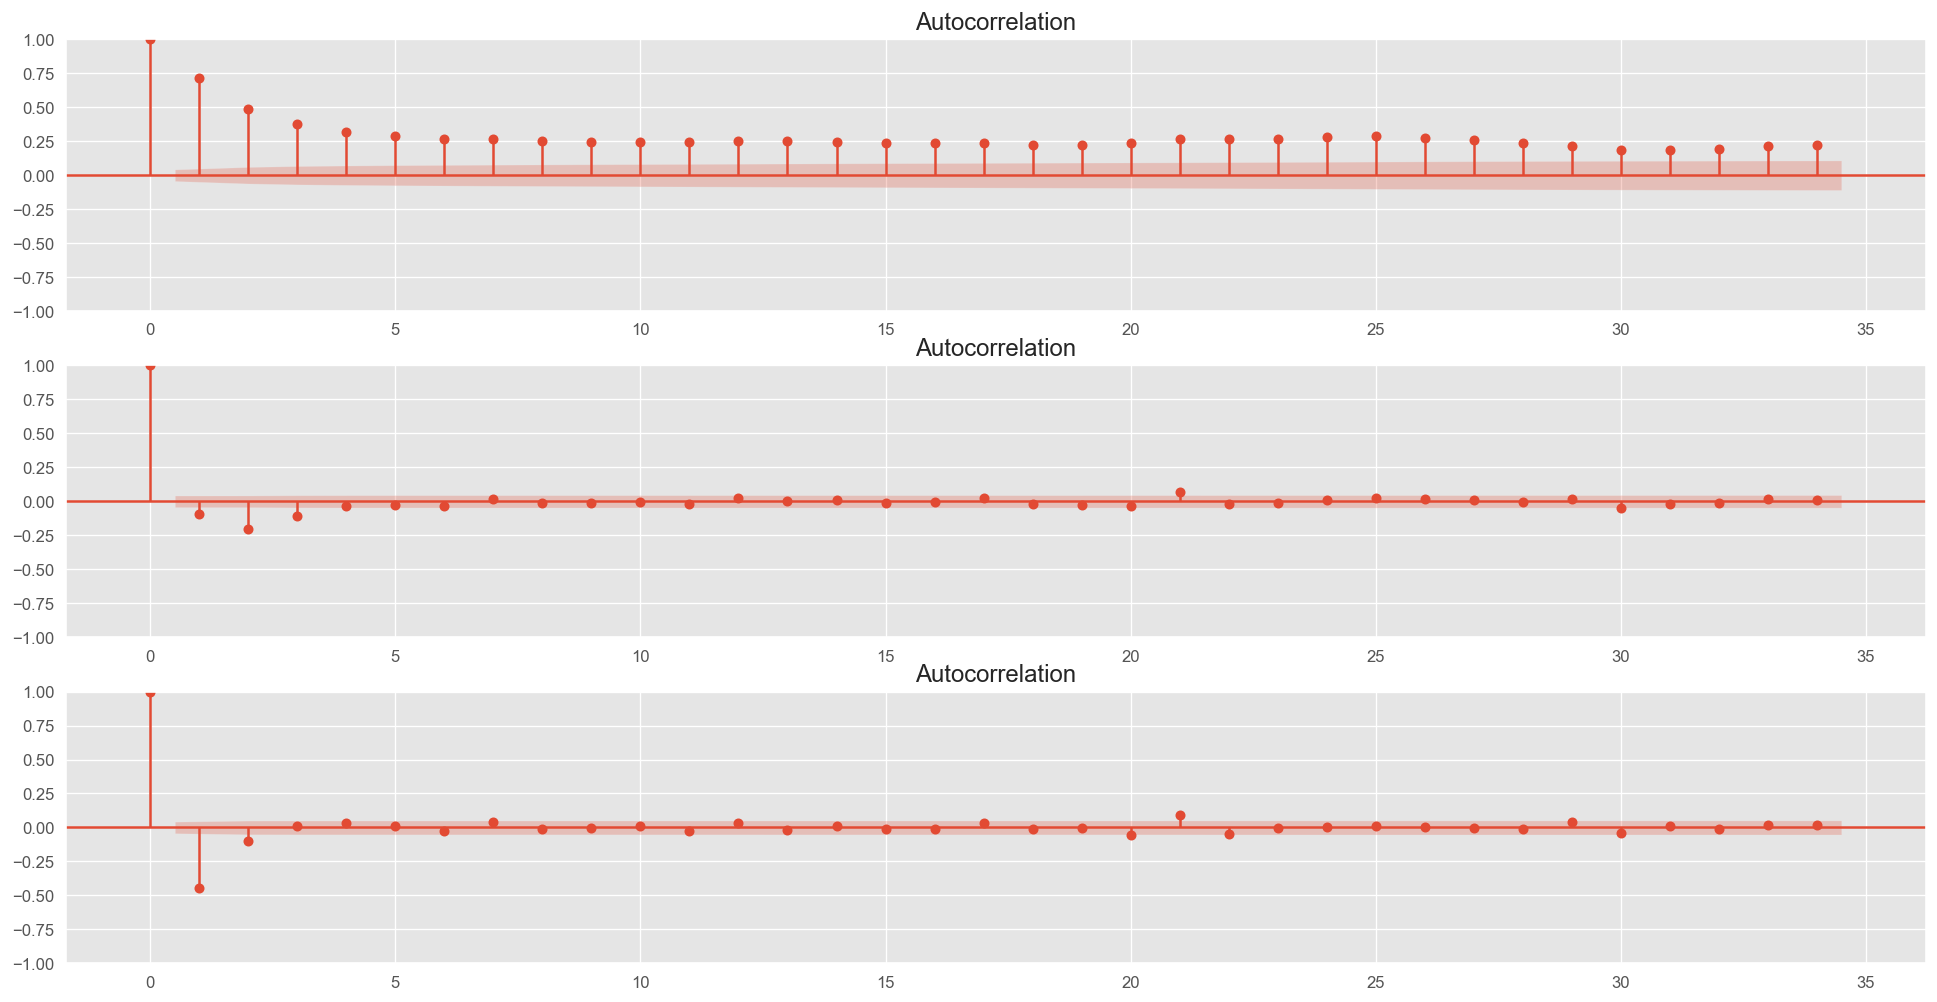

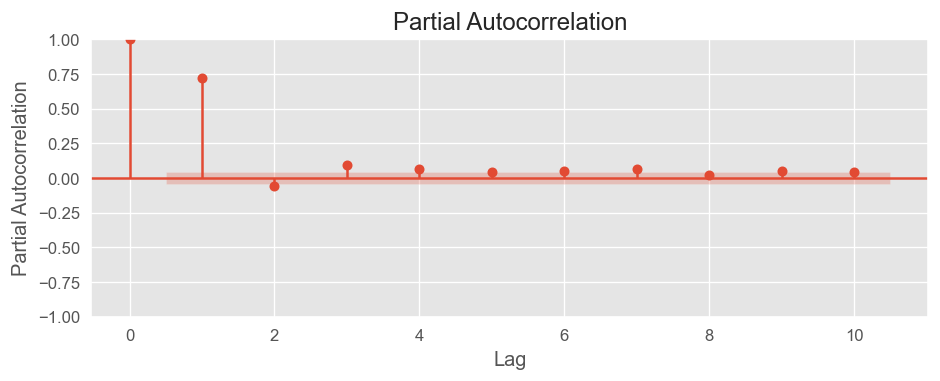

In [163]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(wind_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

p=2 looks like a good starting point based on the graph

#train and test split

In [164]:
wind_power.shape

(2101,)

In [165]:
test_number = 274
train_w = wind_power[:-test_number]
test_w = wind_power[-test_number:]

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_w, order=(3,0,5), seasonal_order=(3,0,5,12),
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09011D+01    |proj g|=  7.00764D+00


 This problem is unconstrained.



At iterate    5    f=  9.73701D+00    |proj g|=  8.65513D-02

At iterate   10    f=  9.69111D+00    |proj g|=  5.61632D-02

At iterate   15    f=  9.68639D+00    |proj g|=  9.72025D-03

At iterate   20    f=  9.68615D+00    |proj g|=  1.58407D-02

At iterate   25    f=  9.68492D+00    |proj g|=  1.38764D-02

At iterate   30    f=  9.68440D+00    |proj g|=  5.51120D-03

At iterate   35    f=  9.68428D+00    |proj g|=  2.88155D-02

At iterate   40    f=  9.68352D+00    |proj g|=  1.20344D-02

At iterate   45    f=  9.68320D+00    |proj g|=  8.95335D-03

At iterate   50    f=  9.68316D+00    |proj g|=  2.63083D-03

At iterate   55    f=  9.68297D+00    |proj g|=  1.24984D-02

At iterate   60    f=  9.68206D+00    |proj g|=  1.60849D-02

At iterate   65    f=  9.67944D+00    |proj g|=  1.02402D-01

At iterate   70    f=  9.67859D+00    |proj g|=  2.47408D-02

At iterate   75    f=  9.67773D+00    |proj g|=  1.20211D-02

At iterate   80    f=  9.67763D+00    |proj g|=  1.77926D-02

At iter

#LSTM MODEL

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Function to preprocess the data for RNN
def preprocess_rnn_data(df, feature_column, target_column, time_steps=24):
    data = df[[feature_column, target_column]].values
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i + time_steps])
        y.append(scaled_data[i + time_steps, 1])
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y, scaler

In [169]:
# Preprocess data for solar generation
X_solar, y_solar, solar_scaler = preprocess_rnn_data(df, 'DE_solar_profile', 'DE_solar_generation_actual')

In [170]:
# Preprocess data for wind generation
X_wind, y_wind, wind_scaler = preprocess_rnn_data(df, 'DE_wind_profile', 'DE_wind_generation_actual')

In [171]:
# Split the data into training and testing sets
X_solar_train, X_solar_test, y_solar_train, y_solar_test = train_test_split(X_solar, y_solar, test_size=0.2, random_state=42)
X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)

In [172]:
# Build the RNN model for solar generation
model_solar = Sequential()
model_solar.add(LSTM(units=50, return_sequences=True, input_shape=(X_solar_train.shape[1], X_solar_train.shape[2])))
model_solar.add(LSTM(units=50))
model_solar.add(Dense(1))
model_solar.compile(optimizer='adam', loss='mean_squared_error')

In [173]:
# Train the model
history_solar = model_solar.fit(X_solar_train, y_solar_train, epochs=10, batch_size=32, validation_split=0.1)



Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0078 - val_loss: 4.6904e-04
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 3.8079e-04 - val_loss: 1.5425e-04
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.6862e-04 - val_loss: 1.4520e-04
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.4050e-04 - val_loss: 1.1257e-04
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.3477e-04 - val_loss: 1.1721e-04
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 1.3771e-04 - val_loss: 1.1784e-04
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.2086e-04 - val_loss: 1.0996e-04
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.0648e-04 - val_loss: 9.1031e-05
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 1.0928e-04 - val_loss: 8.8677e-05
Epoch 10/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 9.7283e-05 - val_loss: 9.2520e-05


In [174]:
# Evaluate the model
solar_test_loss = model_solar.evaluate(X_solar_test, y_solar_test)

315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5045e-05


In [175]:
# Make predictions
y_solar_pred = model_solar.predict(X_solar_test)
y_solar_pred = solar_scaler.inverse_transform(np.concatenate((np.zeros((y_solar_pred.shape[0], 1)), y_solar_pred), axis=1))[:, 1]

315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [176]:
# Build the RNN model for wind generation
model_wind = Sequential()
model_wind.add(LSTM(units=50, return_sequences=True, input_shape=(X_wind_train.shape[1], X_wind_train.shape[2])))
model_wind.add(LSTM(units=50))
model_wind.add(Dense(1))
model_wind.compile(optimizer='adam', loss='mean_squared_error')

In [177]:
# Train the model
history_wind = model_wind.fit(X_wind_train, y_wind_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0043 - val_loss: 5.0317e-04
Epoch 2/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 3.4440e-04 - val_loss: 1.8060e-04
Epoch 3/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.2619e-04 - val_loss: 1.7533e-04
Epoch 4/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.1895e-04 - val_loss: 1.7912e-04
Epoch 5/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 2.0476e-04 - val_loss: 1.6008e-04


In [178]:

# Evaluate the model
wind_test_loss = model_wind.evaluate(X_wind_test, y_wind_test)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5905e-04


In [179]:

# Make predictions
y_wind_pred = model_wind.predict(X_wind_test)
y_wind_pred = wind_scaler.inverse_transform(np.concatenate((np.zeros((y_wind_pred.shape[0], 1)), y_wind_pred), axis=1))[:, 1]


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


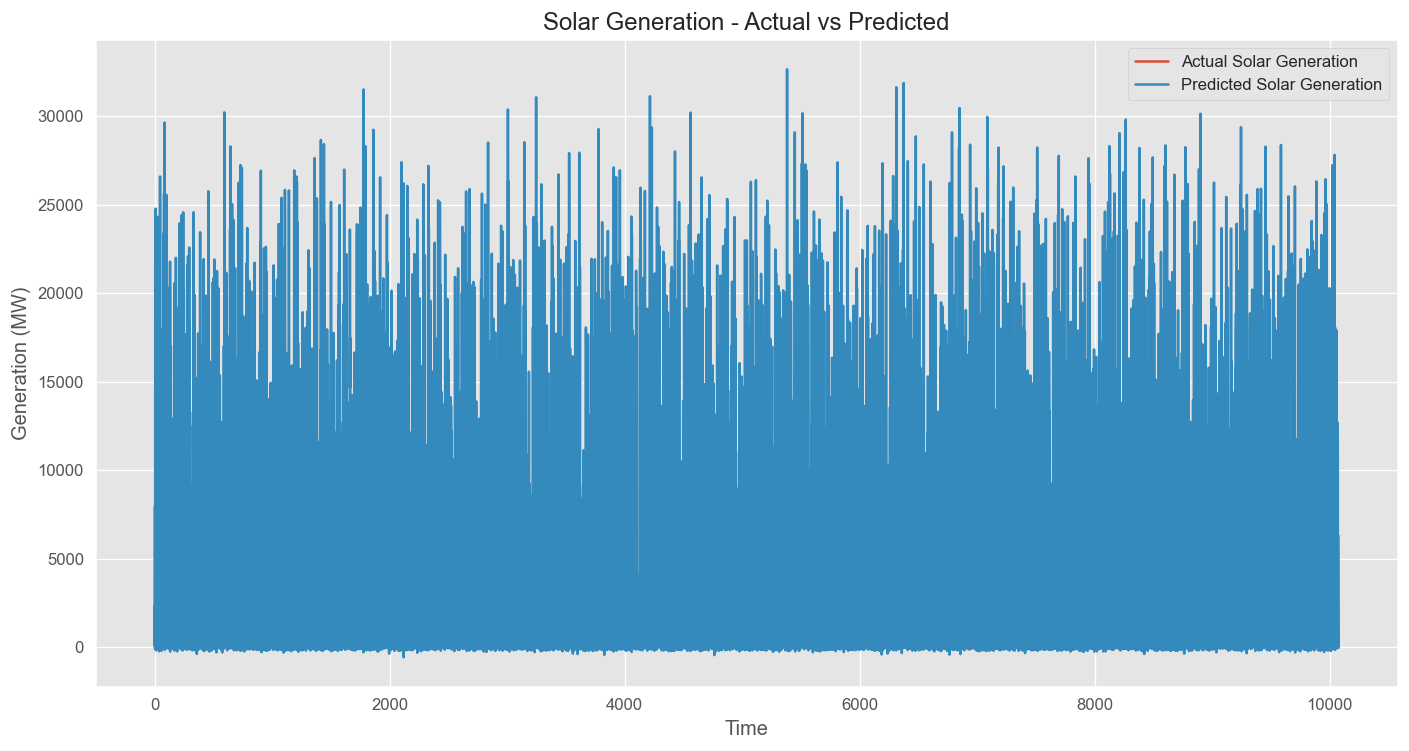

In [180]:

# Plotting predictions vs actual values for solar
plt.figure(figsize=(14, 7))
plt.plot(y_solar_test, label='Actual Solar Generation')
plt.plot(y_solar_pred, label='Predicted Solar Generation')
plt.title('Solar Generation - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()


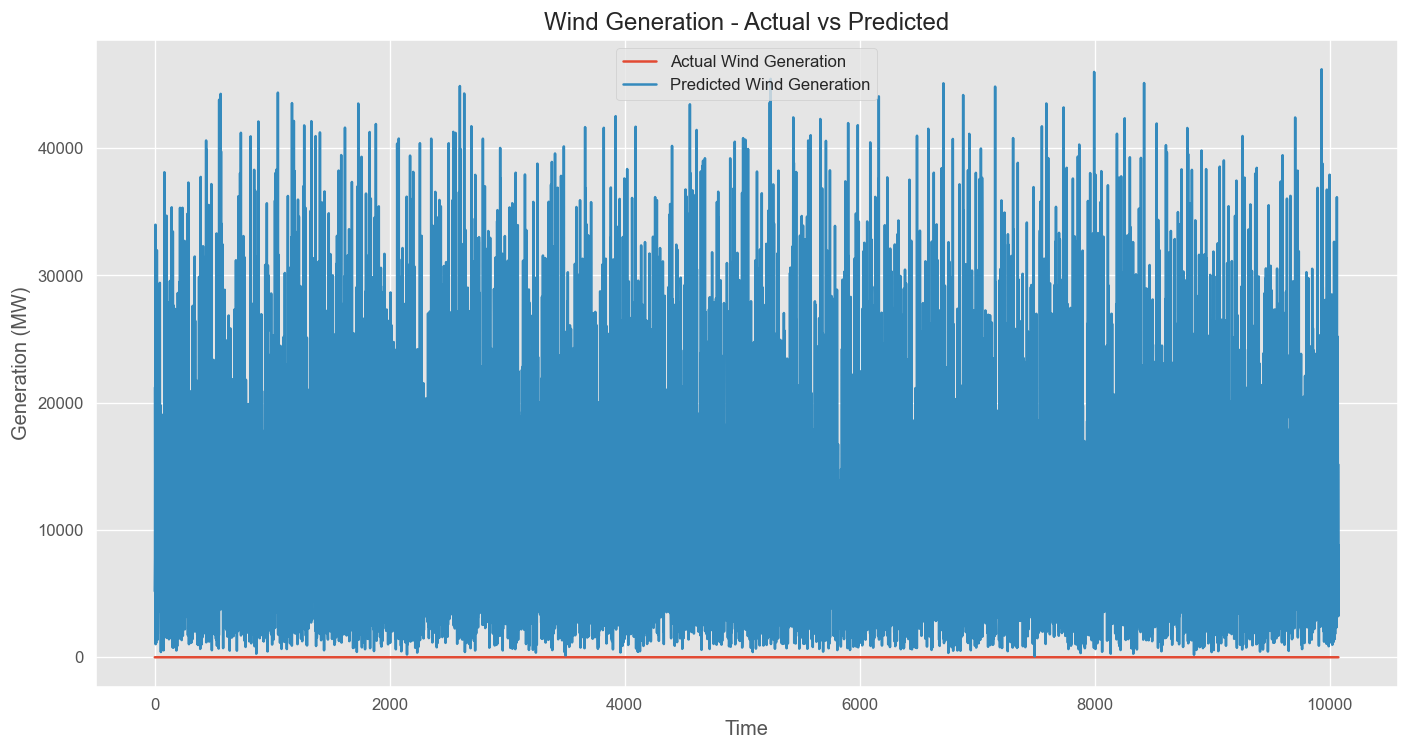

In [181]:

# Plotting predictions vs actual values for wind
plt.figure(figsize=(14, 7))
plt.plot(y_wind_test, label='Actual Wind Generation')
plt.plot(y_wind_pred, label='Predicted Wind Generation')
plt.title('Wind Generation - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()

In [182]:

from lime.lime_tabular import LimeTabularExplainer


In [183]:

# Assuming your data is already preprocessed and split into X_train, X_test, y_train, y_test

# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X1_train),  # Use the training data
    feature_names=['DE_solar_profile'],  # Name of the feature(s)
    class_names=['DE_solar_generation_actual'],  # Name of the target variable
    mode='regression'
)


In [184]:

# Pick an instance from the test set to explain
i = 5  # You can pick any index of a sample from the test set
instance = X1_test[i].reshape(1, -1)


In [185]:

# Explain the instance prediction with Lasso model
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=lasso.predict
)


In [186]:

# Display the explanation
exp.show_in_notebook(show_table=True)


In [187]:

# Similarly, you can do it for the wind model
explainer_wind = LimeTabularExplainer(
    training_data=np.array(X2_train),
    feature_names=['DE_wind_profile'],
    class_names=['DE_wind_generation_actual'],
    mode='regression'
)

instance_wind = X2_test[5].reshape(1, -1)
exp_wind = explainer_wind.explain_instance(
    data_row=instance_wind.flatten(),
    predict_fn=lasso.predict
)

exp_wind.show_in_notebook(show_table=True)


In [188]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Flatten the training data for LIME
X_solar_train_flat = X_solar_train.reshape(X_solar_train.shape[0], -1)

# Create a LIME explainer with the flattened data
explainer_lstm_solar = LimeTabularExplainer(
    training_data=X_solar_train_flat,
    mode='regression',
    feature_names=[f"t{j}_t-{i}" for i in range(X_solar_train.shape[1]) for j in range(X_solar_train.shape[2])],
    discretize_continuous=True
)

# Pick an instance from the test set
i = 0  # Index of the instance
instance_lstm_solar = X_solar_test[i].reshape(1, -1)  # Flatten the instance

# Explain the instance
exp_lstm_solar = explainer_lstm_solar.explain_instance(
    data_row=instance_lstm_solar.flatten(),  # Flatten data_row
    predict_fn=lambda x: model_solar.predict(x.reshape(-1, X_solar_train.shape[1], X_solar_train.shape[2])).flatten()
)

# Display the explanation
exp_lstm_solar.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [189]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Flatten the training data for LIME (Wind)
X_wind_train_flat = X_wind_train.reshape(X_wind_train.shape[0], -1)

# Create a LIME explainer with the flattened data (Wind)
explainer_lstm_wind = LimeTabularExplainer(
    training_data=X_wind_train_flat,
    mode='regression',
    feature_names=[f"t{j}_t-{i}" for i in range(X_wind_train.shape[1]) for j in range(X_wind_train.shape[2])],
    discretize_continuous=True
)

# Pick an instance from the test set (Wind)
i = 0  # Index of the instance
instance_lstm_wind = X_wind_test[i].reshape(1, -1)  # Flatten the instance

# Explain the instance (Wind)
exp_lstm_wind = explainer_lstm_wind.explain_instance(
    data_row=instance_lstm_wind.flatten(),  # Flatten data_row
    predict_fn=lambda x: model_wind.predict(x.reshape(-1, X_wind_train.shape[1], X_wind_train.shape[2])).flatten()
)

# Display the explanation (Wind)
exp_lstm_wind.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
